# SVD & Image Compression

Natasha Watkins

In [640]:
import numpy as np
import scipy.linalg
import scipy.misc
import matplotlib.pyplot as plt

### Problem 1

In [410]:
def compact_svd(A, tol=1e-2):
    A_H = A.conj().T
    λ, V = scipy.linalg.eig(A_H @ A)
    σ = np.sqrt(λ).real
    sort_id = np.argsort(σ)[::-1]
    σ = σ[sort_id]
    V = V[sort_id]
    r = (σ > tol).sum()
    σ_1 = σ[:r]
    V_1 = V[:, :r]
    U_1 = A @ V_1 / σ_1
    return U_1, σ_1, V_1.conj().T

In [411]:
A = np.random.random((6, 6))
np.linalg.matrix_rank(A)

6

In [412]:
U, σ, V = compact_svd(A)

In [413]:
Σ = np.diag(σ)

In [414]:
np.abs(U.T @ U).round()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 4., 0.],
       [0., 0., 0., 0., 0., 6.]])

In [382]:
np.abs(V @ V.T).round()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [415]:
U @ Σ @ V.conj().T

array([[ 0.74154903,  0.94646551,  0.73702546,  0.56489933, -0.29838621,
         0.37796402],
       [ 0.96494993,  0.73566751, -0.27695344,  0.65089914,  0.07193709,
         0.60963112],
       [ 0.66086234,  0.76162817,  0.43616511,  0.42010156, -0.20210309,
        -0.00229114],
       [ 0.45773498,  0.33599981,  0.90782355,  0.59673846, -0.52108919,
         0.56622645],
       [ 0.55226705,  0.53466797,  0.34718139,  0.14775307, -0.84468922,
         0.48096241],
       [ 0.58918804,  0.93998263,  0.44861945,  1.08544282, -0.28160413,
         0.37974972]])

In [416]:
scipy.linalg.svd(A)

(array([[-0.47813873,  0.1110494 , -0.18676266, -0.32142104,  0.37917974,
         -0.69071147],
        [-0.37848338, -0.76008327,  0.37442267,  0.22872428,  0.28114262,
          0.08646068],
        [-0.34260658, -0.03720798, -0.23611117, -0.64247923,  0.07926192,
          0.63751534],
        [-0.39069063,  0.52408373, -0.04210673,  0.56026758,  0.39252139,
          0.32086024],
        [-0.33508573,  0.33722261,  0.76517661, -0.20408266, -0.38159156,
         -0.03523311],
        [-0.49581529, -0.14203581, -0.42650987,  0.27576199, -0.68645025,
         -0.06945318]]),
 array([3.27079371, 1.11455489, 0.72045456, 0.55817712, 0.35816156,
        0.14538128]),
 array([[-0.45065204, -0.30857419, -0.43619204, -0.21035565, -0.46124078,
         -0.50441913],
        [-0.57107593, -0.22541153,  0.45303296, -0.53989755,  0.24599655,
          0.25655291],
        [-0.34962924,  0.72646259, -0.12140693, -0.04781193, -0.42938368,
          0.38550685],
        [-0.45423108, -0.21431753, 

In [417]:
U

array([[-0.48009803,  0.11245512, -0.01889007, -0.33117736,  0.19797362,
        -0.94712442],
       [-0.37484731, -0.76269202,  0.06288422,  0.2468301 , -0.85260983,
        -0.66854138],
       [-0.34221273, -0.03749055, -0.26985603, -0.64051806,  0.16262032,
        -0.19266132],
       [-0.38962424,  0.52331864, -0.13347551,  0.5655777 , -0.13010805,
        -0.95995349],
       [-0.32852409,  0.33251487,  0.20297473, -0.17140893, -1.61625281,
         0.98354795],
       [-0.49848823, -0.14011808, -0.19749235,  0.26245208,  0.6243762 ,
         1.6734368 ]])

In [418]:
σ

array([3.27079371, 1.11455489, 0.72045456, 0.55817712, 0.35816156,
       0.14538128])

In [419]:
V.conj().T

array([[-0.45065204, -0.57107593, -0.34962924, -0.45423108,  0.21735241,
        -0.30818254],
       [-0.30857419, -0.22541153,  0.72646259, -0.21431753, -0.52927492,
        -0.01263981],
       [-0.43619204,  0.45303296, -0.12140693, -0.44051123,  0.05814249,
         0.62636037],
       [-0.21035565, -0.53989755, -0.04781193,  0.53791628,  0.0546148 ,
         0.60797899],
       [-0.50441913,  0.25655291,  0.38550685,  0.3447414 ,  0.58089077,
        -0.27357942],
       [-0.46124078,  0.24599655, -0.42938368,  0.38143338, -0.57343577,
        -0.26086835]])

### Problem 2

In [547]:
def visualise_svd(A):
    
    θ = np.linspace(0, 2 * np.pi, 200)
    S = np.vstack([np.cos(θ), np.sin(θ)])    
    E = np.array([[1, 0, 0],
                  [0, 0, 1]])
    
    U, σ, V = scipy.linalg.svd(A)
    Σ = np.diag(σ)
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    plots = lambda M: [M,
                       V @ M, 
                       Σ @ V @ M, 
                       U @ Σ @ V @ M]
    labels = ['$S$', '$V^HS$', 
              '$\Sigma V^H S$', '$U \Sigma V^H S$']
    
    for ax, p1, p2, l in zip(axes.flatten(), plots(S), plots(E), labels):
        ax.plot(p1[0], p1[1])
        ax.plot(p2[0], p2[1])
        ax.set_title(l, fontsize=16)
        ax.axis('equal')
        
    plt.tight_layout()
    plt.show()

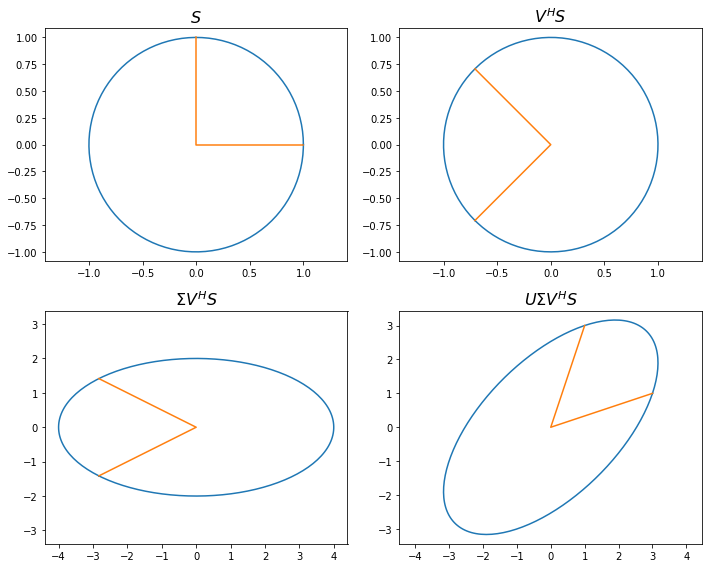

In [548]:
A = np.array([[3, 1], [1, 3]])
visualise_svd(A)

### Problem 3

In [552]:
def compact_svd(A, s):
    
    m, n = A.shape
    
    if s > np.linalg.matrix_rank(A):
        raise ValueError('s is greater than number of non-zero singular values of A')
    
    value_count = m * s + s + n * s
    
    U, σ, V = scipy.linalg.svd(A)
    U_s = U[:, :s]
    σ_s = σ[:s]
    V_s = V[:s, :]
    
    return U_s @ np.diag(σ_s) @ V_s, value_count

In [553]:
A = np.random.random((5, 5))
compact_svd(A, 3)

(array([[0.48969568, 0.1357744 , 0.67296844, 0.25446481, 0.51633656],
        [0.72812803, 0.20281148, 0.64370615, 0.21709125, 0.01308681],
        [0.99570322, 0.45621478, 0.58728589, 0.63870308, 0.412043  ],
        [0.88183604, 0.21741139, 1.00258839, 0.29010364, 0.33007378],
        [0.35366246, 0.3035857 , 0.05442031, 0.53297929, 0.62357432]]), 33)

### Problem 4

In [590]:
def compact_svd2(A, ϵ):
    
    U, σ, V = scipy.linalg.svd(A)
    
    if ϵ < σ.min():
        raise ValueError('ϵ is too small')
        
    s = len(σ[σ > ϵ])

    U_s = U[:, :s]
    σ_s = σ[:s]
    V_s = V[:s, :]
    
    return U_s @ np.diag(σ_s) @ V_s

In [591]:
A = np.random.random((5, 5))
A

array([[0.34400843, 0.06743446, 0.16018881, 0.65201288, 0.71215447],
       [0.07871933, 0.4469549 , 0.63012013, 0.58638602, 0.66880069],
       [0.08141834, 0.60978626, 0.397862  , 0.39398221, 0.40211235],
       [0.40943709, 0.63378561, 0.30971741, 0.37903338, 0.61016196],
       [0.28382428, 0.69055001, 0.04677659, 0.23722129, 0.81852204]])

In [592]:
scipy.linalg.svd(A)[1]

array([2.25442017, 0.59588416, 0.54958556, 0.21087212, 0.10835546])

In [593]:
compact_svd2(A, 0.2)

array([[0.35364924, 0.05801145, 0.1765071 , 0.63214926, 0.72159694],
       [0.0632286 , 0.46209567, 0.60390011, 0.61830264, 0.65362865],
       [0.10726138, 0.58452706, 0.44160462, 0.34073602, 0.42742372],
       [0.39638271, 0.64654507, 0.28762123, 0.4059302 , 0.59737616],
       [0.28372757, 0.69064454, 0.0466129 , 0.23742055, 0.81842732]])

In [595]:
scipy.linalg.norm(A - compact_svd2(A, 0.2))

0.10835546169188355

### Problem 5

In [710]:
def compress_image(file_name, s):
    
    image = plt.imread(file_name) / 255
    
    if image.ndim == 3:                       # Color image
        C = []
        v_total = 0
        for i in range(3):
            color = image[:, :, i]
            color_s, v = compact_svd(color, s)
            v_total += v
            color_s[color_s < 0] = 0
            color_s[color_s > 1] = 1
            C.append(color_s)
        return np.dstack(C), v_total
            
    elif image.ndim == 2:                    # Grayscale image
        print('2')
        image_s, v = compact_svd(image, s)
        image_s[image_s < 0] = 0
        image_s[image_s > 1] = 1
        return image_s, v

In [704]:
compressed_image, v_compressed = compress_image('hubble.jpg', 15)
image = plt.imread('hubble.jpg') / 255

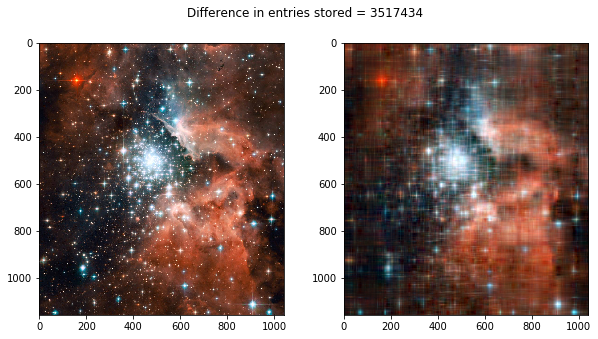

In [705]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[1].imshow(compressed_image)

plt.suptitle(f'Difference in entries stored = {image.size - v_compressed}')
plt.show()

In [721]:
image = plt.imread('cat.gif') / 255
compressed_image, v_compressed = compress_image('cat.gif', 10)

2


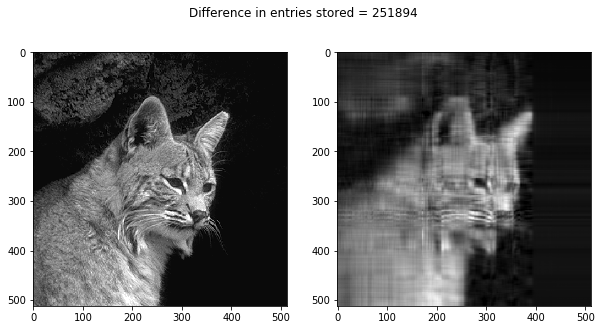

In [722]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(compressed_image, cmap='gray')

plt.suptitle(f'Difference in entries stored = {image.size - v_compressed}')
plt.show()